In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["GEMINI_API_KEY"] = os.getenv("GEMINI_API_KEY")

#Langsmith Tracking And Tracing
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")

In [3]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=3, doc_content_chars_max=500)

wikipefia_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [4]:
resp = wikipefia_tool.run({"query": "Elon Musk"})
resp

"Page: Elon Musk\nSummary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman. He is known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been considered the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion. \nBorn to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada. He received bachelor's degrees from the University of Penn"

In [5]:
from langchain_community.tools import YouTubeSearchTool

tool = YouTubeSearchTool()

resp = tool.run("Sandeep bhagat vlogs")
resp

"['https://www.youtube.com/watch?v=9AuAlWAtAkE&pp=ygUUU2FuZGVlcCBiaGFnYXQgdmxvZ3M%3D', 'https://www.youtube.com/watch?v=JBIDGLw_2nk&pp=ygUUU2FuZGVlcCBiaGFnYXQgdmxvZ3M%3D']"

In [6]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults()

resp = tool.invoke("what happened to recent Air India Ahamdabad London flight")
resp

[{'title': 'Air India Flight 171 - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Air_India_Flight_171',
  'content': '**Air India Flight 171** was a regularly scheduled international [Air India](/wiki/Air_India "Air India") flight from [Ahmedabad Airport](/wiki/Ahmedabad_Airport "Ahmedabad Airport") to [London Gatwick Airport](/wiki/Gatwick_Airport "Gatwick Airport"). Shortly after takeoff at 13:38\xa0IST on 12 June 2025, the [Boeing 787-8 Dreamliner](/wiki/Boeing_787-8_Dreamliner "Boeing 787-8 Dreamliner") operating the flight crashed into the [hostel](/wiki/Dormitory "Dormitory") block of [B. J. Medical [...] Flight 171 took off from runway 23 of [Ahmedabad Airport](/wiki/Ahmedabad_Airport "Ahmedabad Airport") at 13:38 [IST](/wiki/Indian_Standard_Time "Indian Standard Time") (08:08 [UTC](/wiki/Coordinated_Universal_Time "Coordinated Universal Time")) en route to [London Gatwick](/wiki/Gatwick_Airport "Gatwick Airport"). According to [METAR](/wiki/METAR "METAR") reports issued a

In [7]:
from langchain.agents import tool

@tool
def multiply(a: int, b: int)->int:
    '''This tool is for multiplication'''
    return a * b

resp = multiply.invoke({"a":2, "b":3})
resp

6

In [8]:
multiply.name

'multiply'

In [9]:
multiply.description

'This tool is for multiplication'

In [10]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [11]:
@tool
def get_word_length(word:str)->int:
    '''this tool calculates length of word'''
    return len(word)

resp = get_word_length.invoke("hi")
resp

2

In [12]:
get_word_length.description

'this tool calculates length of word'

In [13]:
def function_1(first:str)->str:
    return f'{first} from first function'

def function_2(second:str)->str:
    return f' {second} from second function'

def function_3():
    pass

In [14]:
print(function_1("tushar"))
function_2("shinde")

tushar from first function


' shinde from second function'

In [9]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("fun1",function_1)
workflow.add_node("fun2",function_2)
workflow.add_edge("fun1", "fun2")
workflow.set_entry_point("fun1")
workflow.set_finish_point("fun2")

In [16]:
app = workflow.compile()

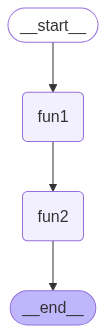

In [17]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
app.invoke("Tushar")

' Tushar from first function from second function'

In [19]:
for output in app.stream("how are you"):
    for key, val in output.items():
        print(key)
        print(val)
        print('-----------')

fun1
how are you from first function
-----------
fun2
 how are you from first function from second function
-----------


In [10]:
from langchain_groq import ChatGroq

model = ChatGroq(model="qwen-qwq-32b")

def llm(input):
    resp = model.invoke(input)
    return resp.content

def token_counter(input):
    tokens = input.split()
    return f'total tokens are {len(tokens)}'

workflow1 = Graph()
workflow1.add_node("llm", llm)
workflow1.add_node("token_counter", token_counter)
workflow1.add_edge("llm", "token_counter")
workflow1.set_entry_point("llm")
workflow1.set_finish_point("token_counter")

app1 = workflow1.compile()

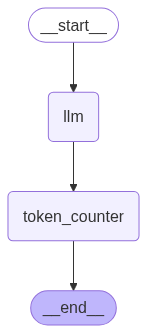

In [21]:
display(Image(app1.get_graph().draw_mermaid_png()))

In [22]:
app1.invoke("what is the capital of india")

'total tokens are 449'

In [23]:
for output in app1.stream("what is the captial of india"):
    for key, val in output.items():
        print(f'{key} ::: {val}')
        print('-'*10)

llm ::: 
<think>
Okay, the user is asking for the capital of India. Let me think. I remember that India's capital isn't Mumbai, even though Mumbai is a major city. Wait, wasn't it shifted from Calcutta to New Delhi at some point? Let me confirm. Yes, during British rule, the capital was Calcutta, but after independence, it was moved to New Delhi. So the current capital is New Delhi. But sometimes people might confuse Delhi and New Delhi. New Delhi is a part of the larger Delhi metropolitan area. So the correct answer should be New Delhi. I should make sure there's no recent changes, but I don't think so. Yeah, that's right. The capital of India is New Delhi.
</think>

The capital of India is **New Delhi**. 

New Delhi serves as the administrative, political, and diplomatic center of the country and houses key government institutions, including the Parliament of India, the Rashtrapati Bhavan (President's residence), and numerous foreign embassies. It was officially designated as the cap

In [4]:
from pydantic import BaseModel, Field

class TopicSelectionParser(BaseModel):
    Topic:str = Field(description="selected topic")
    Reasoning:str = Field(description="reasoning behind topic selection")

In [5]:
from langchain.output_parsers import PydanticOutputParser

parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [6]:
import operator
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [1]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

import faiss
from langchain_community.vectorstores import FAISS

new_vector_store = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)

retriever = new_vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 1})


/Users/tusharshinde/code/my/AI/agentic_n_gen_ai/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

def function_1(state:AgentState):
    print("<-- Supervisor -->")

    question = state["messages"][-1]
    print(f'question= {question}')
    
    template="""
        Your task is to classify the given 'user query' into one of the following categories: [USA,Not Related]. 
        Respond ONLY with a valid JSON object and nothing else.

        User query: {question}
        {format_instructions}
    """

    prompt = PromptTemplate(
        template = template,
        input_variables = ["question"],
        partial_variables = {"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser
    resp = chain.invoke({"question": question})
    
    print(f'resp={resp}')
    # print(f'resp.Reasoning= {resp.Reasoning}')
    # print(f'resp.Topic= {resp.Topic}')

    return {"mesgages": {resp.Topic}}

def function_2(state:AgentState):
    print("<-- LLM Call -->")
    question = state["messages"][0]
    print(f'question= {question}')
    query = "Answer the following question with your knowledge about real world. This is the user querstion " + question
    resp = model.invoke(query)
    print(resp)
    return {"messages": [resp.content]}

def function_3(state:AgentState):
    print("<-- RAG Call -->")
    question = state["messages"][0]

    prompt = PromptTemplate(
        template="""You are an assitant for querion-answering tasks. User the following pieces of retrieved context to answer the question. If you don't 
        know the answer, just say that you don't know. User three sentences maximum and keep the answer concise. \nQuestion: {question} \nContext: {context} 
        \n Answer:
        """,
        input_variables=['context', 'question']
    )

    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )

    result = rag_chain.invoke(question)
    return {"messages": [result]}


# state = {"messages": ["what is the captial of France"]}
# function_1(state)

In [19]:
def router(state: AgentState):
    print("<-- Router -->")
    last_message = state["messages"][-1]
    print(f'{last_message=}')

    if "usa" in last_message.lower():
        return "RAG Call"
    return "LLM Call"

In [20]:
from langgraph.graph import StateGraph, END

workflow2 = StateGraph(AgentState)

workflow2.add_node("Supervisor", function_1)
workflow2.add_node("LLM", function_2)
workflow2.add_node("RAG", function_3)

workflow2.set_entry_point("Supervisor")

workflow2.add_conditional_edges(
    "Supervisor",
    router,
    {
        "LLM Call": "LLM",
        "RAG Call": "RAG",
    }
)


app2 = workflow2.compile()

# display(Image(app2.get_graph().draw_mermaid_png()))

In [21]:
app2.invoke({"messages": ["what is the captial of USA"]})

<-- Supervisor -->
question= what is the captial of USA
resp=Topic='USA' Reasoning="The user is asking about the capital of the USA, which directly relates to geographical or political information about the United States. The query is specifically focused on a key fact about the country, making it clearly relevant to the 'USA' category."
<-- Router -->
last_message='what is the captial of USA'
<-- RAG Call -->


{'messages': ['what is the captial of USA',
  "\n<think>\nOkay, the user is asking for the capital of the USA. Let me check the provided context. The given text seems to be a quote, possibly from a speech, but I don't see any mention of the capital there. The context doesn't include information about geographical or political facts like capital cities. Since the answer isn't in the provided texts, I should state that I don't know based on the given information. The correct answer is Washington, D.C., but since it's not in the context, I can't mention it.\n</think>\n\nThe provided context does not contain information about the capital of the USA. I do not have access to external knowledge beyond the given texts. Therefore, I cannot answer this question based on the provided materials. \n\nAnswer: I don't know."]}

In [22]:
app2.invoke({"messages": ["what is the captial of France"]})

<-- Supervisor -->
question= what is the captial of France
resp=Topic='Not Related' Reasoning="The user query asks about the capital of France, which is a question related to France, not the United States. Therefore, it does not fall under the 'USA' category and is classified as 'Not Related'."
<-- Router -->
last_message='what is the captial of France'
<-- LLM Call -->
question= what is the captial of France
content="\n<think>\nOkay, the user is asking for the capital of France. Let me think. I know that France is a country in Western Europe. The capital cities are usually the political or administrative centers of a country. Paris comes to mind immediately. But wait, maybe I should double-check to be sure. Sometimes people confuse countries with similar names or regions. For example, the French Republic has territories elsewhere, but the main capital is definitely Paris. Also, historically, Paris has been the capital for a long time, right? Let me think of other possibilities. Lyon? 

{'messages': ['what is the captial of France',
  "\n<think>\nOkay, the user is asking for the capital of France. Let me think. I know that France is a country in Western Europe. The capital cities are usually the political or administrative centers of a country. Paris comes to mind immediately. But wait, maybe I should double-check to be sure. Sometimes people confuse countries with similar names or regions. For example, the French Republic has territories elsewhere, but the main capital is definitely Paris. Also, historically, Paris has been the capital for a long time, right? Let me think of other possibilities. Lyon? No, that's a major city but not the capital. Marseille? No, same thing. The Eiffel Tower is in Paris, which is a landmark. The government buildings like the Élysée Palace are there. The president's office is in Paris. So yes, I'm pretty confident the answer is Paris. I don't think there's been any recent changes. Maybe in some alternate reality, but in the real world, i